# Sentiment Analysis using NLTK Vader , TextBlob and Pattern

***Let's Import the libraries and the data set***

In [2]:
#downloading the regular expression library
!pip install regex

import warnings
warnings.filterwarnings('ignore')


In [3]:
# importing the libraries
import re           #importing the regu+lar expression library
import pandas as pd
import numpy as np

***Reading the data***

In [4]:
text = open("hotel_reviews.txt", "r")

***Cleaning the Data***

In [5]:
#Function to remove special characters and numbers from the text

def remove(x):
    pattern = "['\n',@\'?\.$%_0-9]"
    x = [re.sub(pattern, '', i) for i in x]
    return x

In [6]:
clean = remove(text)

In [7]:
#Converting the list type data to string type
def listToString(s):  
    
    # initialize an empty string
    str1 = ""  
    
    # traverse in the string 
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  

In [8]:
clean_text = listToString(clean)


In [9]:
#Splitting the text
splitted_text = clean_text.split('\t')


In [10]:
#loading the clean data in pandas dataframe

data = clean_text
df = pd.DataFrame([x.split(',') for x in data.split('\t')])

#Naming the column of the dataframe 
df.columns = ["Reviews"]
df.head()

,Reviews
0,
1,Nice HotelGreat Location
2,Stayed here for my th B-Day Got Studio King Su...
3,great hotel great service!
4,We stayed one night to celebrate a special bir...


In [11]:
#Removing the '\n' identifier from sentences
df_clean = df[~df['Reviews'].astype(str).str.endswith('\n')]

In [12]:
df_clean.head(10)

,Reviews
0,
1,Nice HotelGreat Location
2,Stayed here for my th B-Day Got Studio King Su...
3,great hotel great service!
4,We stayed one night to celebrate a special bir...
5,really nice hotel
6,i stayed here for one night we haggled the pri...
7,Friendly staff and great location
8,While the contemporary-styled standard rooms h...
9,Awesome!


In [13]:
#Removing the empty row from the top
df_final= df_clean.drop([0])

### Sentiment Analysis Using NLTK Vader

**Downloading the NLTK library**

In [14]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to C:\Users\TURABI
[nltk_data]     TRADERS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
sia = SentimentIntensityAnalyzer()

The NLTK Vader provides the sentiment of the text by providing scores in three different categories i.e. negative, neutral, and positive.

Along with this, the compound is also calculated for each text passed to the NLTK Vader function. The compound attribute is basically a summarized result of all the three categories score.

The value of compound ranges from -1(most extreme negative) and +1 (most extreme positive). This is normalized value as it helps in better analysis and further usage.

In [16]:
df_final['neg'] = df_final['Reviews'].apply(lambda x:sia.polarity_scores(x)['neg'])
df_final['neu'] = df_final['Reviews'].apply(lambda x:sia.polarity_scores(x)['neu'])
df_final['pos'] = df_final['Reviews'].apply(lambda x:sia.polarity_scores(x)['pos'])
df_final['compound'] = df_final['Reviews'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [17]:
df_final.head()

,Reviews,neg,neu,pos,compound
1,Nice HotelGreat Location,0.000,0.417,0.583,0.4215
2,Stayed here for my th B-Day Got Studio King Su...,0.023,0.742,0.235,0.9705
3,great hotel great service!,0.000,0.191,0.809,0.8588
4,We stayed one night to celebrate a special bir...,0.000,0.771,0.229,0.9835
5,really nice hotel,0.000,0.393,0.607,0.4754


In [18]:
vader_comp = df_final["compound"].mean()

#### NLTK Vader

In [19]:
print("The average polarity of hotel review is:",vader_comp)

The average polarity of hotel review is: 0.5901388170055453


### Sentiment Analysis Using TextBlob

**Let's download the Textblob library**

In [20]:
!pip install textblob

In [21]:
#importing the textblob library 
from textblob import TextBlob

Let's create a function to calculate the sentiment attributes of our dataset easily. 

We will create a new dataframe df_textblob to store the results of sentiment score for each sentence in our dataset.

In [22]:
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
df_textblob = df_final.Reviews.apply(detect_polarity)

Unlike the NLTK Vader library, Textblob returns us a single score/polarity for each sentence.

In [24]:
df_textblob.head()

1    0.600000
2    0.342692
3    0.900000
4    0.311664
5    0.600000
Name: Reviews, dtype: float64

Let's calculate the mean of all of these scores to get a summarized view of all the polarity scores.


In [25]:
tb_polarity = df_textblob.mean()

#### Text Blob Results

In [26]:
print("The average polarity of hotel review is:",tb_polarity)

The average polarity of hotel review is: 0.31679424056015665


### Sentiment Analysis Using Pattern

**Let's download the Pattern library**

In [27]:
!pip install pattern

In [28]:
#importing the sentiment function from the pattern library
nltk.download('omw-1.4')
from pattern.en import sentiment

[nltk_data] Downloading package omw-1.4 to C:\Users\TURABI
[nltk_data]     TRADERS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Let's create our own custom function senti_pattern, to find the sentiment scores for each of the sentences in our hotel review data set.

In [29]:
def senti_pattern(text):
    return sentiment(text)

In [30]:
df_pattern = df_final.Reviews.apply(senti_pattern)

Here we are able to see in the results that both sentiment score also known as polarity is obtained as the first value in the output and the second value is the subjectivity score.

In [31]:
df_pattern.head()

1                                  (0.6, 1.0)
2    (0.3426923076923077, 0.5019230769230769)
3                                 (0.9, 0.75)
4     (0.3116636904761905, 0.668107142857143)
5                                  (0.6, 1.0)
Name: Reviews, dtype: object

The output is a list of tuples, so let's convert it to two different tuples.

The output obtained is present in tuple, thus to perform further operations we need to convert this list of tuples into two different tuples. For this conversion, we will use zip function of python. This will help us in getting two individual tuples which can then be used for our operations.

In [32]:
sentiment,subjectivity = zip(*df_pattern)

In [33]:
sentiment

(0.6,
 0.3426923076923077,
 0.9,
 0.3116636904761905,
 0.6,
 0.3084722222222223,
 0.5875,
 0.15312499999999998,
 1.0,
 0.4328571428571429,
 0.5681818181818181,
 0.3571578884078884,
 0.8,
 0.4125,
 0.0,
 0.12911725955204217,
 0.48333333333333334,
 0.22242063492063494,
 0.5375,
 0.43499999999999994,
 0.7,
 0.21607331821617534,
 0.6,
 0.22142857142857145,
 0.0,
 0.14255070546737214,
 0.0,
 -0.004807972997628167,
 0.6333333333333334,
 0.4620878787878787,
 0.0,
 0.24758731617647065,
 0.8,
 0.464534632034632,
 0.0,
 0.11050827423167847,
 0.8,
 0.389386936592819,
 0.9,
 0.28097643097643094,
 0.8,
 0.19769976551226554,
 0.6833333333333332,
 0.2230357142857143,
 0.5166666666666667,
 0.21551587301587302,
 -0.75,
 0.13246527777777778,
 0.3181818181818182,
 0.19999999999999998,
 0.6,
 0.20242997198879553,
 0.12916666666666665,
 0.23307453416149065,
 0.65,
 0.3059803921568628,
 0.0,
 0.12607641326391325,
 -0.4,
 0.11363636363636363,
 -0.25,
 0.12900883838383836,
 0.6666666666666666,
 0.224911680581

To find the average of the sentiment score and subjectivity score in tuples, Let's build a custom function for calculating these two attributes average.

In [34]:
def average(values):
    sum = 0
    count = 0
    for num in values:
        try:
            sum += float(num)
            count += 1
        except: pass
    return sum / count

#### Pattern Results

In [35]:
print("The sentiment of hotel review is:",'%7.2f'%(average(sentiment)))
print("The subjectivity of hotel review is:",'%7.2f'%(average(subjectivity)))

The sentiment of hotel review is:    0.32
The subjectivity of hotel review is:    0.57


### NLTK Vader vs Text Blob vs Pattern

Now let's compare the results of the three libraries

In [36]:
#importing matplotlib to visualize the results
import matplotlib.pyplot as plt
import numpy

In [37]:
labels = ['NLTK Vader','TextBlob','Pattern']
sentiment_count = [0.59,0.31,0.32]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

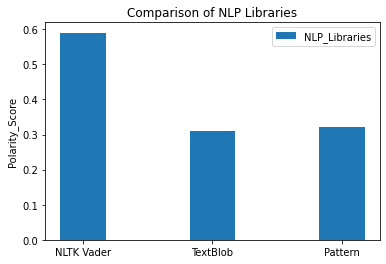

In [38]:
fig, ax = plt.subplots()
rects = ax.bar(x, sentiment_count, width, label='NLP_Libraries')

ax.set_ylabel('Polarity_Score')
ax.set_title('Comparison of NLP Libraries')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



plt.show()